# 2D Convolution

https://abdulsamet-ileri.medium.com/2d-convolution-ced5d339aa5

* Convolution, 1D’de (konuşma işlemede), 2D’de (görüntü işlemede) veya 3D’de (video işlemede) çalışabilir.

* Görüntü işleme alanında feature extraction (ham piksel değerlerini, daha anlamlı ve yararlı bilgilere dönüştürme işlemi) için kullanılan ve aynı zamanda Convolutional Neural Networks (CNNs) temel bloğu sayılan 2D Convolution hakkında bilgiler

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

* Görüntü 0-255 arasındaki uint8 ifadelerden oluşan bir matristir.
* Bu matrisin boyutu (görüntü yüksekliği) x (görüntü genişliği) x (görüntü kanal sayısı) olarak ifade edilir.
* Gri tonlamalı bir görüntünün kanal (channel) sayısı 1 iken, renkli bir görüntünün (RGB) kanalı sayısı 3'tür.

In [3]:
bgr = cv2.imread('./images/circle.jpg')
bgr.shape

(640, 640, 3)

![image layers](https://www.researchgate.net/publication/267210444/figure/fig6/AS:295732335661069@1447519491773/A-three-dimensional-RGB-matrix-Each-layer-of-the-matrix-is-a-two-dimensional-matrix.png)

* Her 2D renkli görüntüyü, her biri ayrı renk kodu içeren 3 gri tonlamalı görüntüden oluşan bir kombinasyon şeklinde gösterebiliriz.

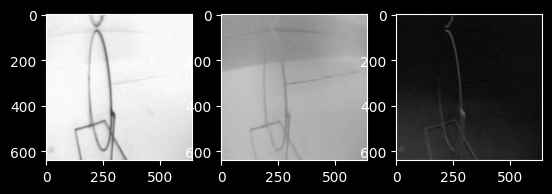

In [10]:
# Blue Channel
plt.subplot(131)
plt.imshow(cv2.cvtColor(bgr[:,:,0],cv2.COLOR_BGR2RGB))
# Green Channel
plt.subplot(132)
plt.imshow(cv2.cvtColor(bgr[:,:,1],cv2.COLOR_BGR2RGB))
# Red Channel
plt.subplot(133)
plt.imshow(cv2.cvtColor(bgr[:,:,2],cv2.COLOR_BGR2RGB))
plt.show()

* Convolution ile her piksele bir matematiksel operatör uygular, değerlerinde oynama yapılır.
* Bu matematiksel operatöründe uygulanması, kernel olarak adlandırılan (genelde image matrisden -kaynak resmimizin ifade edildiği matris- daha küçük bir boyutta alınan) farklı bir matris ile olur.

* Bu işlem şu şekilde yapılır.

* Kernel matrisin ilk elemanı, image matrisin ilk elemanına gelecek şekilde yerleştirilir. Yani kernel matrisin her elemanı, image matris üzerinde bir elemanın üzerinde durur.

![convolution output](https://miro.medium.com/v2/resize:fit:828/format:webp/1*KeVPc4izW03g7kQjHWh6qw.png)

* Sonra, kernel matrisin her elemanını, image matrisde karşılığı olan (yani üst üste binen) elemanla çarpılır.

* Çarpmalar sonucunda çıkan değerler toplanıp, output matrisde image matrisinde kernelin merkezi olan aynı konuma yerleştirilir.

* Yukarıdaki resimde 105*0 + 102*(-1) + 100 * 0 + 103 *(-1) + 99 * 5 + 103 * (-1) + 101 * 0 + 98*(-1) + 104*0 = 89 olarak değer bulunur ve merkeze yerleştirilir.

* Yapılan işlem karışık gibi görünsede, özünde vektörlerde yapılan nokta çarpımıdır.

![convolution output matrix](https://miro.medium.com/v2/resize:fit:828/format:webp/1*RCViY3poAlQbmfWswrKR-g.png)

* Doğrudan karşılık gelen elemanları çarp, birbiri ile topla, merkezi konuma o değeri ata diyoruz. Bu işlem bittikten sonra kernel matris, image matris üzerinde kaydırılarak aynı işlem tekrar ediliyor ve output matris dolduruluyor.

* Dikkat edildiğinde bu yöntemle output matrisin kenarları için herhangi bir hesaplama yapılamıyor. Bu duruma önerilen birkaç çözüm var.

* Kenarları iptal edip, output matrisi küçültebiliyoruz.

* Kullandığımız kernel size’ına bağlı olarak input matrisimize padding ekliyebiliyoruz ki yukarıdaki örnekte 1 pixellik padding(3x3 kernel size için) uygulayabiliriz.

![output matris](https://miro.medium.com/v2/resize:fit:828/format:webp/1*K0aQI-BPGcugxOR640bzcg.png)

* Aynı işlemleri tekrarlıyoruz fakat burda bir problemimiz var. Output matrisde 0 ile 255 arasında alınması gereken pixel değeri maximum değerimi aşıyor, 320. Bunu çözmek içinde farklı yöntemler uygulanıyor. Mesela Histogram Equalization bunlardan birisidir.

* Kavramsal olarak bu işlemlere bakıldığı zaman, kernel’e image filter ve kernel’in verilen image’e uygulanmasına image filtering deniliyor. Output olarak çıkan image’e de dolayısıyla filtered image adı veriliyor.

* Kernel matrisinde alınacak değerlere göre, resimler üzerinde blurring (bulanıklaştırma), detecting edges(kenarları belirleme) gibi birçok işlemi yapılabilir.

![image example](https://miro.medium.com/v2/resize:fit:640/format:webp/1*2nT9qOim0Id8vPaYx3Ve8w.png)

* Merkezi nokta alınmasının sebebi signal sistemlerde çokca adını duyduğumuz delta(impulse) fonksiyonudur. Signal sistemlerinde, sisteme input olarak ne verilirse verilsin eğer o sistemin delta fonksiyonu biliniyorsa, sistemin outputu convolution ile rahatlıkla bulanabilir.

![impulse function](https://miro.medium.com/v2/resize:fit:828/format:webp/1*n2H00cD_UAFz2PhcHVwx8g.png)

* Bu fonksiyon m ile n sıfır alındığında 1 çıktısı verip, diğer bütün noktalarda sıfır çıktısını veririr. Bu çıktı ise de görüntü işleme alanında kernel ya da filtre deniliyor.